In [1]:
%matplotlib inline
#--------------------
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft
import os
import wave

In [2]:
# Params
L = 16
L2 = L + 2
N = 128
W = np.linspace(0,0.5,N)
x = np.zeros(N)
x[np.random.randint(N-1)] = N/2

In [3]:
# Filters
def fir(x,N,L):
    y = np.zeros(N)
    for n in np.arange(0,N):
        for l in np.arange(L):
            try:
                y[n] += x[n-l]/L
            except IndexError:
                break
    return y

def recFir(x,N,L):
    y = np.zeros(N)
    for i in np.arange(1,N):
        try:
            y[i] = y[i-1] + (x[i] - x[i-L])/L
        except IndexError:
            break
    return y

def lpf(x,N,L):
    y = np.zeros(N)
    for n in np.arange(N):
        for l in np.arange(L):
            try:
                y[n] += (-1)**l * x[n-l]/L
            except IndexError:
                break
    return y

Первое

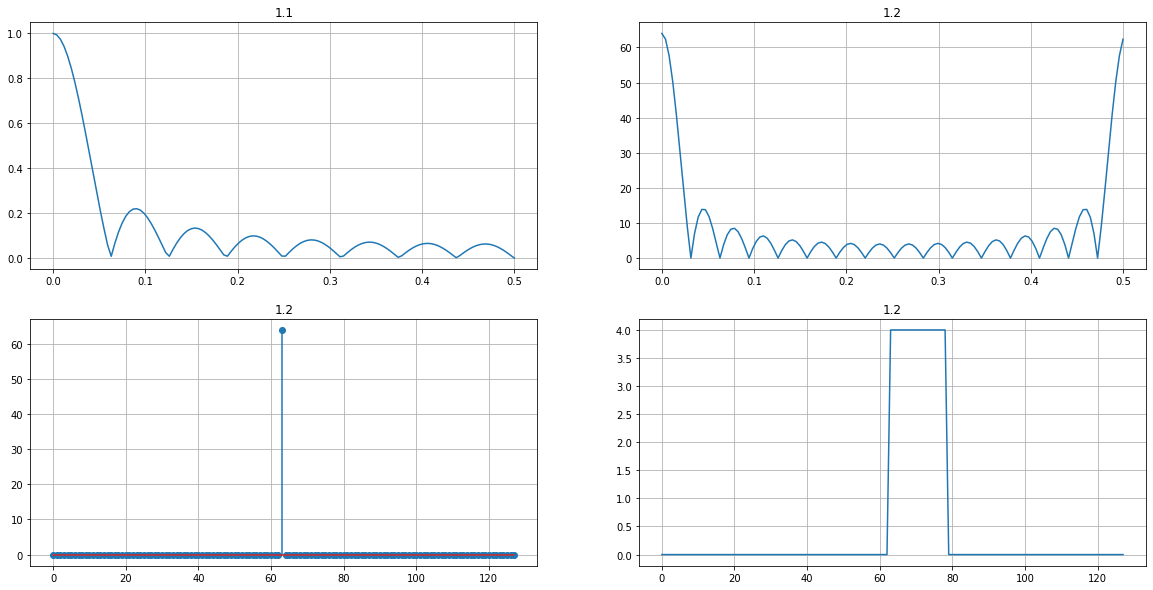

In [4]:
plt.figure(figsize=(20,10))
#---------------------
def A(w,L):
    pi = np.pi
    temp = 0
    for l in np.arange(0,L/2):
        temp += np.cos(2*pi*w*l - pi*w*(L-1))
    temp *= 2/L
    return temp

y = [A(i,L) for i in W]
plt.subplot(221)
plt.title('1.1')
plt.grid(True)
plt.plot(W,np.abs(y))
#-----------------------
y = fir(x,N,L)
plt.subplot(222)
plt.title('1.2')
plt.grid(True)
plt.plot(W,np.abs(fft(y)))

plt.subplot(223)
plt.title('1.2')
plt.grid(True)
plt.stem(np.arange(N),x)

plt.subplot(224)
plt.title('1.2')
plt.grid(True)
plt.plot(np.arange(N),y)

Второе

<ipython-input-5-b57829ae860d>:5: RuntimeWarning: invalid value encountered in double_scalars
  y[i] = np.sin(np.pi*L2*w)/np.sin(np.pi*w)


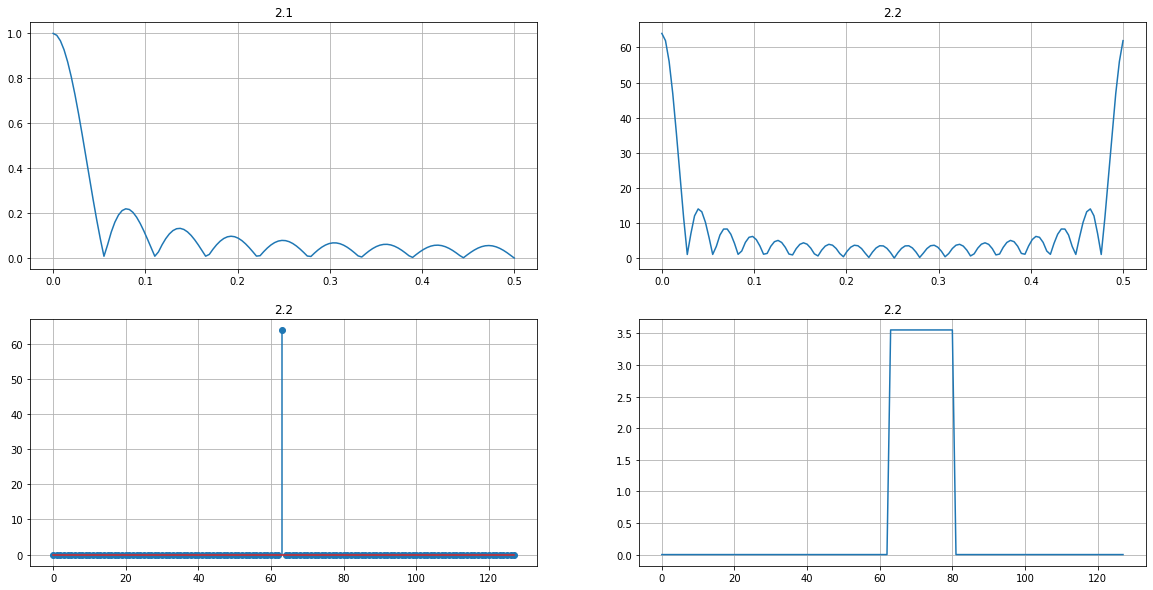

In [5]:
plt.figure(figsize=(20,10))
#-------------------------
y = np.zeros(N)
for i,w in enumerate(W):
    y[i] = np.sin(np.pi*L2*w)/np.sin(np.pi*w)
    y[i] *= 1/L2
    
y = np.nan_to_num(y,nan=1)
plt.subplot(221)
plt.title('2.1')
plt.grid(True)
plt.plot(W,np.abs(y))
#----------------------
y = recFir(x,N,L2)
plt.subplot(222)
plt.title('2.2')
plt.grid(True)
plt.plot(W,np.abs(fft(y)))

plt.subplot(223)
plt.title('2.2')
plt.grid(True)
plt.stem(np.arange(N),x)

plt.subplot(224)
plt.title('2.2')
plt.grid(True)
plt.plot(np.arange(N),y)

Третье

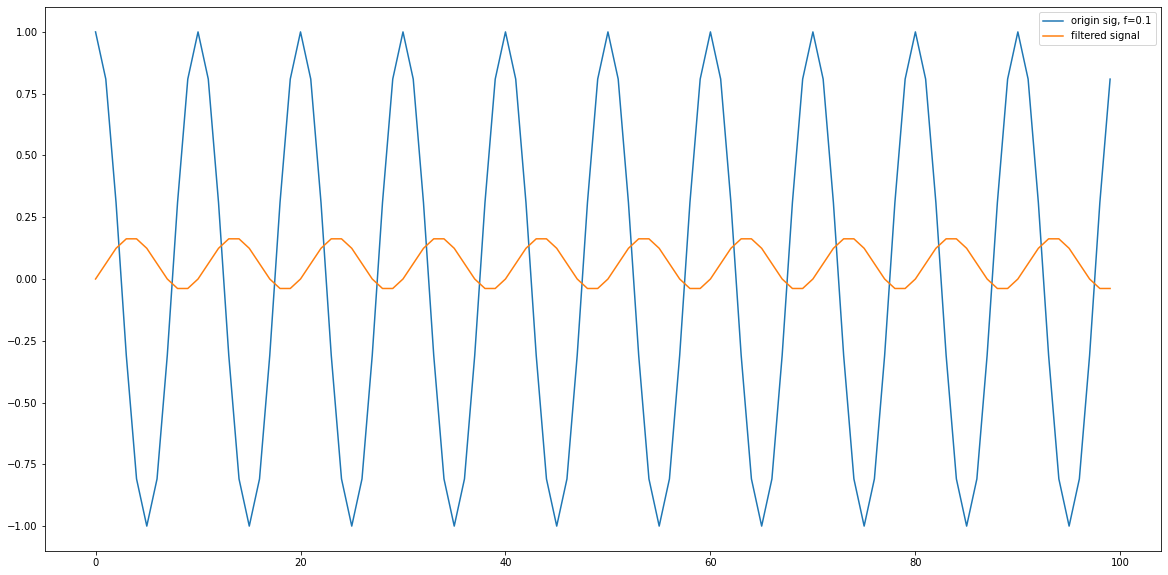

In [6]:
plt.figure(figsize=(20,10))

N2 = 100
t = np.arange(N2)
# Origin signal
x2 = np.cos(2*np.pi*0.1*t)
plt.plot(np.arange(N2),x2,label='origin sig, f=0.1')

#RecFIR
y = recFir(x2,N2,L2)
#Ploting
y = np.around(y,10)
plt.plot(np.arange(N2),y,label='filtered signal')
plt.legend()
plt.show()

Четвертое

<ipython-input-7-21efded638a8>:5: RuntimeWarning: invalid value encountered in double_scalars
  y[i] = np.sin(np.pi*L2*(w-0.5))/np.sin(np.pi*(w-0.5))/L2


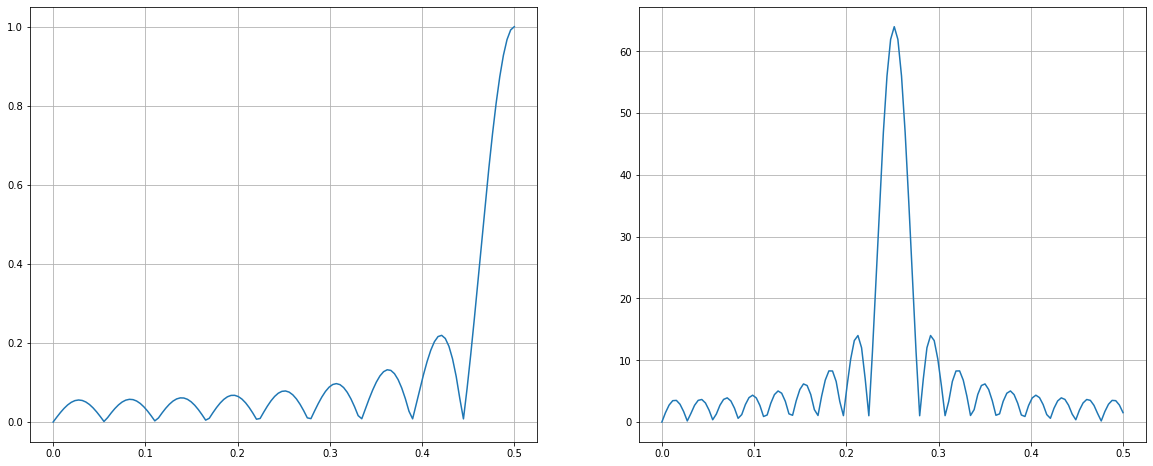

In [7]:
plt.figure(figsize=(20,8))

y = np.zeros(N)
for i,w in enumerate(W):
    y[i] = np.sin(np.pi*L2*(w-0.5))/np.sin(np.pi*(w-0.5))/L2
y = np.nan_to_num(y,nan=1)
plt.subplot(121)
plt.grid(True)
plt.plot(W,np.abs(y))
#-------------------
y = lpf(x,N,L2)
y = fft(y)
plt.subplot(122)
plt.grid(True)
plt.plot(W,np.abs(y))

Пятое

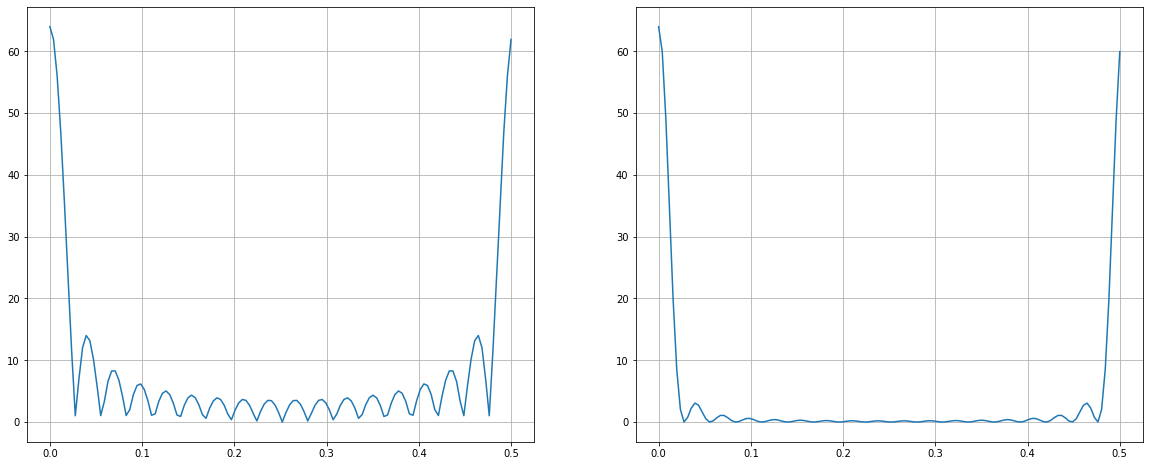

In [8]:
plt.figure(figsize=(20,8))

y = fir(x,N,L2)
plt.subplot(121)
plt.grid(True)
plt.plot(W,np.abs(fft(y)))

y2 = fir(y,N,L2)
y2 = fft(y2)
plt.subplot(122)
plt.grid(True)
plt.plot(W,np.abs(y2))

Шестое

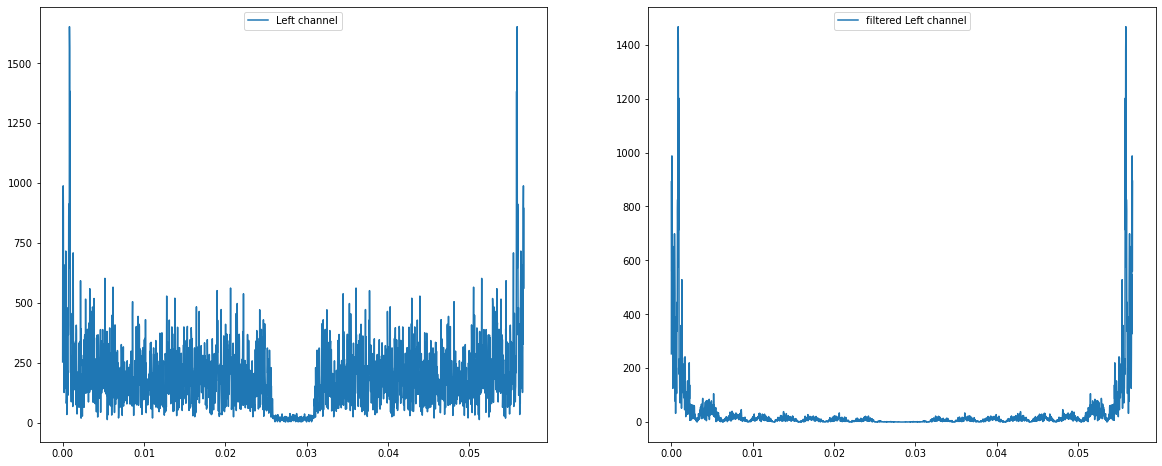

In [9]:
file_name = 'Starset_Monster.wav'
file_path = os.path.join(os.path.abspath(os.getcwd()),'..',file_name)
sample_rate, data = wavfile.read(file_path)
t = 0
samples = data[t:t+2500,0]
length = samples.shape[0] / sample_rate
time = np.linspace(0., length, samples.shape[0])

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(time, np.abs(fft(samples)), label="Left channel")
plt.legend()

y = fir(samples,samples.shape[0],L2)
plt.subplot(122)
plt.plot(time, np.abs(fft(y)), label="filtered Left channel")
plt.legend()
plt.show()


In [10]:
print(os.path.abspath(os.getcwd()))

e:\Different things\university\цос\lab3
